# ENSEMBLE METHODS: bagging, boosting and stacking

## VOTING CLASSIFIERS : moon dataset

### HARD VOTING

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
                             voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [3]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.904


### SOFT VOTING
- If all classifiers are able to estimate CLASS PROBABILITIES, then you can tell Scikit-Learn to predict the class with the highest class probability, averaged over all the individual classifers
- It often achives higher performance than "HARD VOTING"
- voting="soft"  and esure all classifiers can estimate class probabilities

In [4]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [5]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


# BAGGING AND PASTING
- Another approach is to use the same training algorithms for every predictor and train them on different random subsets of the training set.
 - When sampling with replacment this is called "BAGGING" (BOOTSTRAP AGGREGATION)
 - When samplig without replacment this is called "PASTING"
 - Both Bagging and Pasting allow training instances to be sampled several times across multiple predictors, but only BAGGING allows training instances to be sampled several times fro the same predictor
 
 ## AGREGATION FUNCTION: agregating the predictions for all predictors
 - AGREGATTION FUNCTION: statistical mode ( the most frequent prediction) for classification, or the average for regression
 
 ### each indiviual predictor has a higher bias than if it were trained on the original training set, but aggregation reduces both bias and variance. Generally the net result is that the ensemble has a similar bias but a lower variance
 
 ### PREDICTORS CAN BE ALL TRAINED IN PARALLEL , VIA DIFFERENT CPU CORES, OR EVEN DIFFERENT SERVERS. SIMILARLY PREDICTIONS CAN BE MADE IN PARALLEL
 
 - That is the reason why baggin and pasting are so popular, because the scale well
 - FOLOWING CODE TRAINS AN ENSEMBLE OF 500 DECISIO TREE CLASSIFIERS: EACH IS TRAINED ON 100 TRAINING INSTANCES RANDOMLY SAMPLED FROM THE TRAINING SET WITH REPLACMENT (if you want to do pasting set bootstrap=False). The n-jobs parameter tells Scikit-Learn the number of cores to use, -1 means use them all¡

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, 
                           max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

### Out-of-Bag EVALUATION:
- Due to the nature of bootstrap, the instances that are not sampled can be used for testing (OUT OF THE BAG)

In [9]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, 
                           max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, oob_score=True)

In [10]:
bag_clf.oob_score_ #IT'S LIKELY TO ACHIVE 92% ON THE TEST SET

0.92

In [12]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

In [13]:
bag_clf.oob_decision_function_ # Class probability for each instance

array([[0.35641026, 0.64358974],
       [0.4231738 , 0.5768262 ],
       [1.        , 0.        ],
       [0.0078329 , 0.9921671 ],
       [0.02072539, 0.97927461],
       [0.1119403 , 0.8880597 ],
       [0.42199488, 0.57800512],
       [0.06896552, 0.93103448],
       [0.9453125 , 0.0546875 ],
       [0.85526316, 0.14473684],
       [0.52645503, 0.47354497],
       [0.0703125 , 0.9296875 ],
       [0.74736842, 0.25263158],
       [0.90697674, 0.09302326],
       [0.92207792, 0.07792208],
       [0.07908163, 0.92091837],
       [0.03804348, 0.96195652],
       [0.94736842, 0.05263158],
       [0.69863014, 0.30136986],
       [0.96842105, 0.03157895],
       [0.04904632, 0.95095368],
       [0.25396825, 0.74603175],
       [0.88860104, 0.11139896],
       [0.98522167, 0.01477833],
       [0.96883117, 0.03116883],
       [0.00533333, 0.99466667],
       [0.96808511, 0.03191489],
       [0.9974026 , 0.0025974 ],
       [0.03092784, 0.96907216],
       [0.77690289, 0.22309711],
       [0.

## RANDOM PATCHES AND RANDOM SUBSPACES
### RANDOM PATCHES METHOD: Sampling both training instances and features
- Each predictor will be trained in a different subset of features

### RANDOM SUBSPACES METHOD: Keeping all training instances (bootstrap=False and max_samples=1) but sampling features ( bootstrap_features=True and/or max_features<1
- Sampling features results in even more predictor diversity, more bias and lower variance

# RANDOM FOREST
- An ensemble of Decision Trees, generally trained via Bagging, typically with max_samples set to the size of the training set. 
- Use the class RandomForestClassifier which is optimized for this porpuse
- With a few exceptions RFC has everithing to deal whit esambling

In [14]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [15]:
bag_clf = BaggingClassifier( DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
                           n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

## FEATURE IMPORTANCE

### IRIS DATASET

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09619797280322026
sepal width (cm) 0.023378262984672746
petal length (cm) 0.4270690667304022
petal width (cm) 0.4533546974817048


## MNIST dataset

In [18]:

from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])


RandomForestClassifier(random_state=42)

[Text(1, 0.0, 'Not important'),
 Text(1, 0.009791489757332336, 'Very important')]

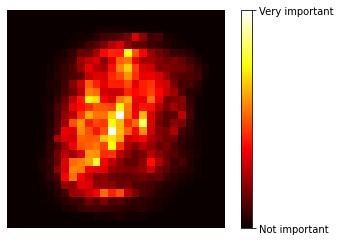

In [22]:
import matplotlib as mpl
from matplotlib import pyplot as plt
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")
    
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

# BOOSTING
- Any Ensemble method that can combine several weak learners into a stronger learner. The general idea of most boosting methods is to train predctors sequentially, each trying to correct its predecessor

# AdaBoost: Adaptive Boosting
- Pay a little bit more attention to the training instances that the predecessor underfitted.
- This results in new predictors focusing more and more on the hard cases
- FOR EXAMPLE:
    - First trains a base classifier (such as a Decission Tree) and uses it to make predictions on the trainin set. The algorithm then increases the relative wieghts of misclassified training instanecs.
    - The it trains a Secon classifier, using the updated weights, and again makes predictions on the training set.

In [23]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
                            algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

# GRADIENT BOOSTING
- Works by sequentially adding predictors to an ensemble, each one correcting its predecessor
- Instead of tewking wights at everty iteration like AdaBoost does, this method tries to fit the new predictor to the "residual errors" made by the previous predictor.

### GRADIENT TREE BOOSTING or GRADIENT BOOSTED REGRESSION TREES (GBRT)
- First, let's fit a DecissionTreeREgressor to the treaining set

In [24]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [25]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

y2 = y - tree_reg1.predict(X)

tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

y3 = y2 - tree_reg2.predict(X)

tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

In [28]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

 - Or using directly Scikit-Learn to train GBRT ensembles

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt= GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.1)
gbrt.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=3)

#### IN ORDER TO FIND THE OPTIMAL NUMBER OF TREES, YOU CAN USE EARLY STOPPING

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors= [mean_squared_error(y_val, y_pred)
        for y_pred in gbrt.staged_predict(X_val)]
best_n_estimators = np.argmin(errors) + 1

gbrt_best= GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators)
gbrt_best.fit(X_trainin, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=85)

Text(0.5, 0, '$x_1$')

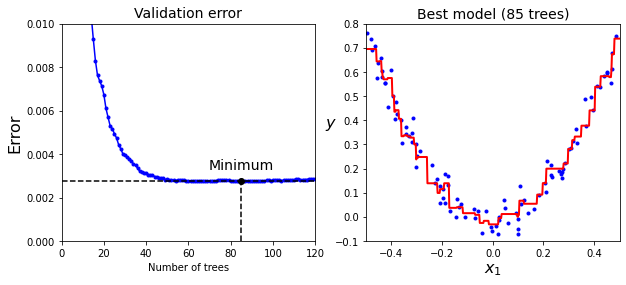

In [34]:

def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)



min_error = np.min(errors)
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(np.arange(1, len(errors) + 1), errors, "b.-")
plt.plot([best_n_estimators, best_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(best_n_estimators, min_error, "ko")
plt.text(best_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % best_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)




### It's possible to implement EARLY STTOPING
- By setting "warm_start=True"
- The folowwing code stops when training the validation error does not improve for five iterations in a row

In [35]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")
error_going_up = 0

for n_estimators in range(1,120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up=0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break #early stopping

## A MORE POWERFULL APPROACH USING XGBoost

In [36]:
import xgboost

ModuleNotFoundError: No module named 'xgboost'

# STACKING: Last Ensemble method we will discuss
- Stacked Generalization
- Instead of using trivial functions to aggregate the preddictions of all predictios in an ensemble, why don't we train a model to perform this aggregation?
- Final Predictor: A Blender or a Meta Lerner
    - TO TRAIN A BLENDER: Use a hold-out set:
    - First the tarining set is split into 2 subsets. 
        - The fisrt Subset: Its used to train the rpedictors in the first layer
        - Next, the first Layer's predictor are used to make predictions on the second (held-out) set.
        - This ensures that the predictions are "clean", since the predictores never saw the instancecs during training. 
        - FOr each instance in the hold-out set there are predicted values.
        - We can create a new training set using these predicted values as input features and keeping the target values. THE BLENDER IS TRAINED in this new TRaining set
        - So it learns to predic the target value, given the first layer's predictions
         
 - The TRICK is to SPLIT THE TRAINING SET into 3 different subsets
     - FISRT ONE: Used to train the fisrt layer 
     - SECOND ONE: Used to create a traininn set used to train the second layer (using predictions made by the first layer)
     - THIRD ONE: Used to create the training set to train the third layer( using predictions made by predictions of the second layer
##### ONCE THIS IS DONE, WE CAN MAKE PREDICTION FOR A NEW INSTANCE BY GOING THROUGH  EACH LAYER SEQUENTIALLY